# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df=pd.DataFrame(data,labels)
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
print(df.info())
print("")
print(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None

             age animal priority     visits
count   8.000000     10       10  10.000000
unique       NaN      3        2        NaN
top          NaN    cat       no        NaN
freq         NaN      4        6        NaN
mean    3.437500    NaN      NaN   1.900000
std     2.007797    NaN      NaN   0.875595
min     0.500000    NaN      NaN   1.000000
25%     2.375000    NaN      NaN   1.000000
50%     3.000000    NaN      NaN   2.000000
75%     4.625000    NaN      NaN   2.750000
max     7.000000    NaN      NaN   3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print(df.head(3))
print("")
print (df.iloc[:3])

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.iloc[[3,4,8]][['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df["visits"]>3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[pd.isna(df["age"])]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df["animal"]== "cat") & (df["age"]<3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[(2<df["age"]) & (df["age"]<4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df["age"]["f"]=1.5
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print(np.sum(df["visits"]))
print(df["visits"].sum())

19
19


```Calculate the mean age for each different animal in `df`.```

In [0]:
ani=list(set(df["animal"]))
for a in ani:
  newdf=df[df["animal"]==a]
  print(a+" mean is "+str(newdf["age"].mean()))


dog mean is 5.0
snake mean is 2.5
cat mean is 2.3333333333333335


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```



*   List item
*   List item



In [0]:
df.loc["k"]= [5,"cardiocha","no",80]
print(df)
df=df.drop(["k"])
print(df)

   age     animal priority  visits
a  2.5        cat      yes       1
b  3.0        cat      yes       3
c  0.5      snake       no       2
d  NaN        dog      yes       3
e  5.0        dog       no       2
f  1.5        cat       no       3
g  4.5      snake       no       1
h  NaN        cat      yes       1
i  7.0        dog       no       2
j  3.0        dog       no       1
k  5.0  cardiocha       no      80
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Count the number of each type of animal in `df`.```

In [0]:
ani=list(set(df["animal"]))
dic={}
for a in ani:
  dic[a]=0

for a in df["animal"]:
  dic[a]+=1
print(dic)

{'cat': 4, 'dog': 4, 'snake': 2}


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
print(df.sort_values(["age"],ascending=False))
print(df.sort_values(["visits"],ascending=True))

   age animal priority  visits
i  7.0    dog       no       2
e  5.0    dog       no       2
g  4.5  snake       no       1
b  3.0    cat      yes       3
j  3.0    dog       no       1
a  2.5    cat      yes       1
f  1.5    cat       no       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
h  NaN    cat      yes       1
   age animal priority  visits
a  2.5    cat      yes       1
g  4.5  snake       no       1
h  NaN    cat      yes       1
j  3.0    dog       no       1
c  0.5  snake       no       2
e  5.0    dog       no       2
i  7.0    dog       no       2
b  3.0    cat      yes       3
d  NaN    dog      yes       3
f  1.5    cat       no       3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df=df.replace("yes",True)
df=df.replace("no",False)
print(df)

   age animal  priority  visits
a  2.5    cat      True       1
b  3.0    cat      True       3
c  0.5  snake     False       2
d  NaN    dog      True       3
e  5.0    dog     False       2
f  1.5    cat     False       3
g  4.5  snake     False       1
h  NaN    cat      True       1
i  7.0    dog     False       2
j  3.0    dog     False       1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df=df.replace("snake","python")
print(df)

   age  animal  priority  visits
a  2.5     cat      True       1
b  3.0     cat      True       3
c  0.5  python     False       2
d  NaN     dog      True       3
e  5.0     dog     False       2
f  1.5     cat     False       3
g  4.5  python     False       1
h  NaN     cat      True       1
i  7.0     dog     False       2
j  3.0     dog     False       1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
print(pd.pivot_table(df,values='age', index=['animal'],
                     columns=['visits'], aggfunc=np.mean))

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
data={ "age": list(np.random.randint(20,65,1000)),
       "skill": list(np.clip(np.random.normal(0.5,0.3,1000),0,1)),
       "height": list(np.around(np.random.uniform(1.5,2,1000),2))}

df1=pd.DataFrame(data)
print(df1)

     age  height     skill
0     36    1.78  0.429244
1     33    1.89  0.270388
2     23    1.54  0.851134
3     31    1.62  0.364519
4     47    1.73  0.323609
5     23    1.90  0.506047
6     56    1.92  0.651507
7     52    1.76  0.422513
8     64    1.88  0.568613
9     28    1.75  0.311866
10    58    1.85  0.968906
11    23    1.80  0.548514
12    46    1.54  0.757716
13    59    1.77  0.800900
14    49    1.59  0.310540
15    23    1.85  0.492123
16    54    1.63  0.765838
17    20    1.83  0.386138
18    56    1.60  0.343080
19    29    1.76  0.531737
20    38    1.92  0.288625
21    57    1.59  0.541148
22    41    1.94  0.673660
23    58    1.79  0.432991
24    44    1.88  0.163900
25    42    1.60  0.065858
26    62    1.79  1.000000
27    47    1.59  0.664735
28    56    1.62  0.345264
29    22    1.90  0.891172
..   ...     ...       ...
970   23    1.52  1.000000
971   43    1.96  0.438881
972   64    1.76  0.275950
973   30    1.98  1.000000
974   29    1.52  0.023385
9

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
salary=[1000*((df1["age"][i])**2/1000+1.7*df1["skill"][i]+
             0.4*np.exp(-(df1["height"][i]-1.7)**2)) for i in range(1000)]
df1["salary"]=salary
print(df1)

     age  height     skill       salary
0     36    1.78  0.429244  2127.162277
1     33    1.89  0.270388  1845.477872
2     23    1.54  0.851134  1836.817122
3     31    1.62  0.364519  1017.131117
4     47    1.73  0.323609  2949.776027
5     23    1.90  0.506047  1244.596293
6     56    1.92  0.651507  4488.662999
7     52    1.76  0.422513  3116.834134
8     64    1.88  0.568613  5353.889010
9     28    1.75  0.311866   929.174274
10    58    1.85  0.968906  5038.241468
11    23    1.80  0.548514  1328.492887
12    46    1.54  0.757716  3678.006905
13    59    1.77  0.800900  4759.575089
14    49    1.59  0.310540  2923.106347
15    23    1.85  0.492123  1227.709408
16    54    1.63  0.765838  3699.968763
17    20    1.83  0.386138  1049.730781
18    56    1.60  0.343080  3979.256221
19    29    1.76  0.531737  1302.515586
20    38    1.92  0.288625  1871.764118
21    57    1.59  0.541148  4315.140537
22    41    1.94  0.673660  2522.833197
23    58    1.79  0.432991  4132.857035


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
new={"age":[],"rowsnum":[],"meansal":[],"maxH":[]}
# new2={"age":[],"rowsnum":[],"meansal":[],"maxH":[]}
groups = df1.groupby(['age'])
for a,g in groups:
  new["age"].append(a)
  new["rowsnum"].append(len(g))
  new["meansal"].append(g["salary"].mean())
  new["maxH"].append(g["height"].max())
# for a,
new_df1=pd.DataFrame(new)
new_df1 = new_df1.set_index("age")
print(new_df1)

     maxH      meansal  rowsnum
age                            
20   2.00  1280.175328       22
21   2.00  1220.741480       29
22   1.98  1337.912945       21
23   1.99  1360.709120       27
24   1.98  1272.828993       23
25   1.99  1236.423556       24
26   2.00  1417.339265       28
27   1.97  1273.926704       23
28   2.00  1381.639428       19
29   1.98  1113.534504       21
30   1.99  1267.452526       24
31   1.99  1201.843811       20
32   1.97  2213.017185       22
33   1.98  2149.275480       18
34   1.94  2373.093089       24
35   2.00  2262.250152       24
36   1.94  2217.386161       24
37   1.89  2147.930561       17
38   2.00  2385.536674       19
39   2.00  2297.299725       23
40   1.97  2295.411114       22
41   1.99  2241.911852       21
42   1.98  2341.273226       24
43   1.99  2058.045886       22
44   1.97  2183.606404       21
45   1.99  3322.632027       25
46   1.98  3099.558095       21
47   1.99  3176.802390       25
48   2.00  3098.771434       20
49   1.9

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
new2={"age":[],"meansal/heights":[]}
groups = df1.groupby(["age"])
for a,g in groups:
  new2["age"].append(a)
  new2["meansal/heights"].append(g["salary"].mean()/g["height"].sum())
new2_df1=pd.DataFrame(new2)
new2_df1 = new2_df1.set_index("age")
print(new2_df1)

     meansal/heights
age                 
20         31.617074
21         23.865914
22         36.091528
23         29.006803
24         31.900476
25         29.700302
26         28.261999
27         31.808407
28         40.901108
29         31.518101
30         30.336346
31         33.892944
32         57.962734
33         67.736384
34         58.335622
35         53.104464
36         52.908283
37         74.997575
38         71.875163
39         55.557430
40         61.971142
41         60.871894
42         57.076383
43         52.010257
44         58.416437
45         74.935319
46         87.139671
47         72.167251
48         85.530539
49         72.465159
50         73.533168
51         85.566695
52         76.138564
53        131.373842
54        103.390789
55        109.361934
56        110.852225
57        179.415456
58        112.428174
59        101.415752
60        126.545194
61        143.781365
62         83.760776
63        130.860523
64        102.098742


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

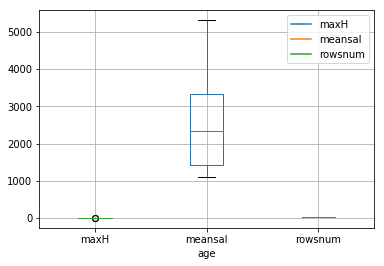

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

new_df1.plot()
new_df1.boxplot()

```Save the result as a csv```

In [0]:
from google.colab import files
new_df1.to_csv("new_df1.csv")
files.download("new_df1.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
# df=df.set_index("Id") ran once

In [0]:

print("oldest house id is: "+str(np.argmin(df["YearBuilt"]))+". built in: "+str(np.min(df["YearBuilt"])))

oldest house id is: 1350. built in: 1872


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [0]:
df[df["YearBuilt"]==1872]["SalePrice"].max()

122000

In [0]:
df["LotArea"].mean()

10516.828082191782

In [0]:
df["LotArea"].quantile()

9478.5

In [0]:
print("no fireplace: " +str(len(df[df["Fireplaces"]==0])))
print("fireplace: "+str(len(df["Fireplaces"])-len(df[df["Fireplaces"]==0])))

no fireplace: 690
fireplace: 770


In [0]:
df[df["PoolArea"]>0]["SalePrice"].mean()

288138.5714285714

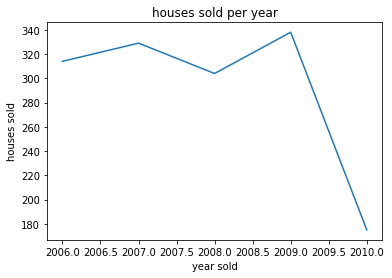

In [0]:
groups = df.groupby(["YrSold"])
years=[]
count=[]
for year, group in groups:
  years.append(year)
  count.append(len(group["YrSold"]))
plt.figure()
plt.plot(years,count)
plt.xlabel("year sold")
plt.ylabel("houses sold")
plt.title("houses sold per year")
plt.show()
  

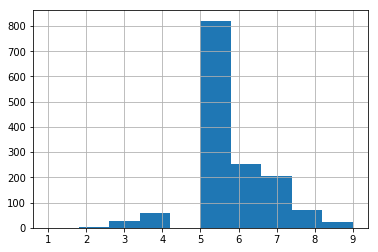

In [0]:
condition = df["OverallCond"]
hist = condition.hist()


In [0]:
# For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
new={"firplaces":[],"meanPrice":[],"meanAge":[],"FullBath":[]}
groups = df.groupby(["Fireplaces"])
for firplace, group in groups:
  new["firplaces"].append(firplace)
  new["meanPrice"].append(group["SalePrice"].mean())
  new["meanAge"].append(2019-group["YearBuilt"].mean())                    
  new["FullBath"].append(len(set(group["FullBath"])))
temp_df=pd.DataFrame(new)
temp_df = temp_df.set_index("firplaces")
temp_df

,FullBath,meanAge,meanPrice
firplaces,,,
0,4,54.781159,141331.482609
1,4,39.150769,211843.909231
2,4,54.347826,240588.539130
3,2,38.400000,252000.000000


In [0]:
# Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. 
# For each group compute the mean, max, min and standard deviation of OverallQual
temp_df_yes20=df[(df["MSSubClass"]>60) & (df["MSSubClass"]%20==0)]
temp_df_no20=df[(df["MSSubClass"]>60) & (df["MSSubClass"]%20!=0)]

print(temp_df_yes20["OverallQual"].mean(),
temp_df_yes20["OverallQual"].min(),
temp_df_yes20["OverallQual"].max(),
temp_df_yes20["OverallQual"].std())

print(temp_df_no20["OverallQual"].mean(),
temp_df_no20["OverallQual"].min(),
temp_df_no20["OverallQual"].max(),
temp_df_no20["OverallQual"].std())


(6.389908256880734, 4, 9, 1.1110210319700957)
(5.556179775280899, 3, 10, 1.1930547655966777)


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')


![alt text](https://)```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df["LotArea_squared_meters"]=df["LotArea"]*0.092903
df["1stFlrSF + 2ndFlrSF"]=df["1stFlrSF"]+df["2ndFlrSF"]
df["sqrt_GarageArea"]=df["GarageArea"]**0.5
df["LotArea / (BedroomAbvGr+1)"]=df["LotArea"] / (df["BedroomAbvGr"]+1)
df["LotArea_mean"]=df.apply(lambda row: row["LotArea"]/(df[df["YearBuilt"] == row["YearBuilt"]]["LotArea"].mean()/1e-5), axis = 1)
#didt do the last 2


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')